<a href="https://colab.research.google.com/github/hvmdvvn/Intro-to-Computer-Vision/blob/main/Lab_05_Morphological_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

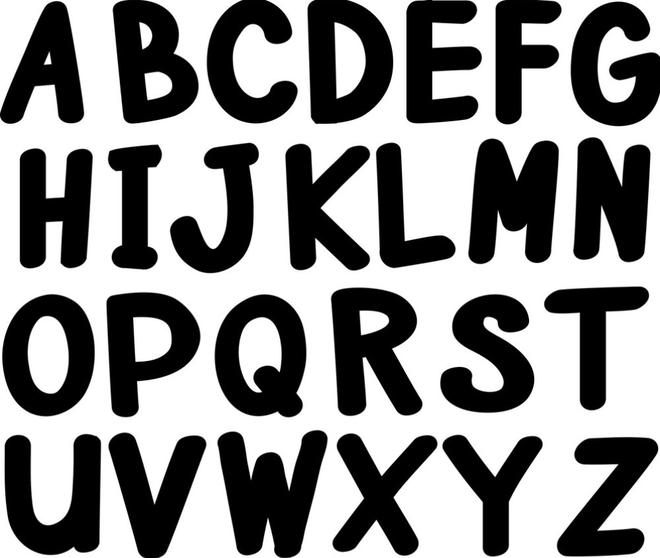

In [2]:
image = cv2.imread("/content/Img.jpg")

cv2_imshow(image)

cv2.waitKey(0)
cv2.destroyAllWindows()

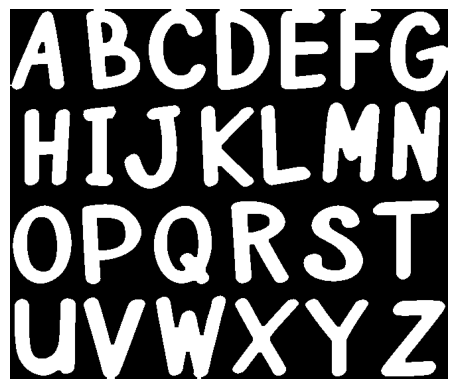

(<matplotlib.image.AxesImage at 0x79a2fa1ade50>,
 (np.float64(-0.5), np.float64(659.5), np.float64(557.5), np.float64(-0.5)),
 None)

In [6]:
import cv2, numpy as np, matplotlib.pyplot as plt

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

k = np.ones((5, 5), np.uint8)  # Define 5x5 kernel
inv = cv2.bitwise_not(bin)
out = cv2.erode(inv, k, 1)
plt.imshow(out, cmap='gray'), plt.axis('off'), plt.show()

## **Lab Task 1: Erosion and Dilation**

### **Objective**

* Implement and understand the effects of **erosion** and **dilation** morphological operations using OpenCV.

---

### **Instructions**

* Choose an image for testing.
* Implement erosion and dilation on the image with **varying kernel sizes and iterations**.
* Display the original image along with the results after erosion and dilation.
* Provide a brief explanation of the impact of different kernel sizes and iteration values.

---

In [7]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [8]:
kernels = {
    '3x3': np.ones((3, 3), np.uint8),
    '5x5': np.ones((5, 5), np.uint8),
    '7x7': np.ones((7, 7), np.uint8)
}

In [9]:
results = []
for size, k in kernels.items():
    erosion = cv2.erode(binary, k, iterations=1)
    dilation = cv2.dilate(binary, k, iterations=1)
    results.append((size, erosion, dilation))

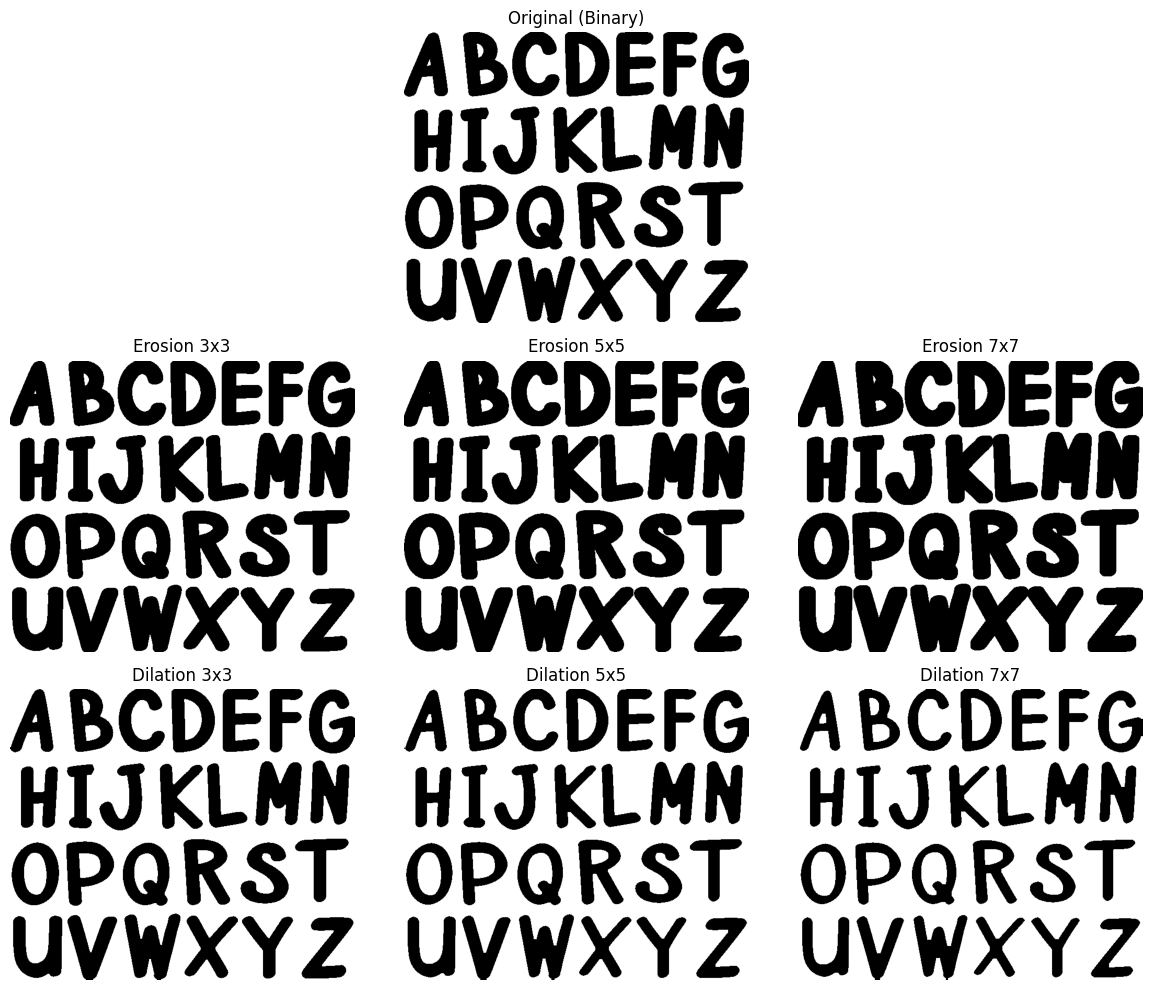

In [11]:
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Original (Binary)')
plt.axis('off')

for i, (size, erosion, _) in enumerate(results, start=4):
    plt.subplot(3, 3, i)
    plt.imshow(erosion, cmap='gray')
    plt.title(f'Erosion {size}')
    plt.axis('off')

for i, (size, _, dilation) in enumerate(results, start=7):
    plt.subplot(3, 3, i)
    plt.imshow(dilation, cmap='gray')
    plt.title(f'Dilation {size}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Lab Task 2: Opening and Closing**

### **Objective**

Apply **opening** and **closing** morphological operations and analyze their effects on an image using OpenCV.

---

### **Instructions**

* Choose a **different image** for testing.
* Implement **opening** and **closing** operations using appropriate structuring elements.
* Display the **original image** along with the results after opening and closing.
* Discuss how these operations influence different types of image structures.

---

In [12]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [13]:
kernel = np.ones((5, 5), np.uint8)

In [14]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=1)

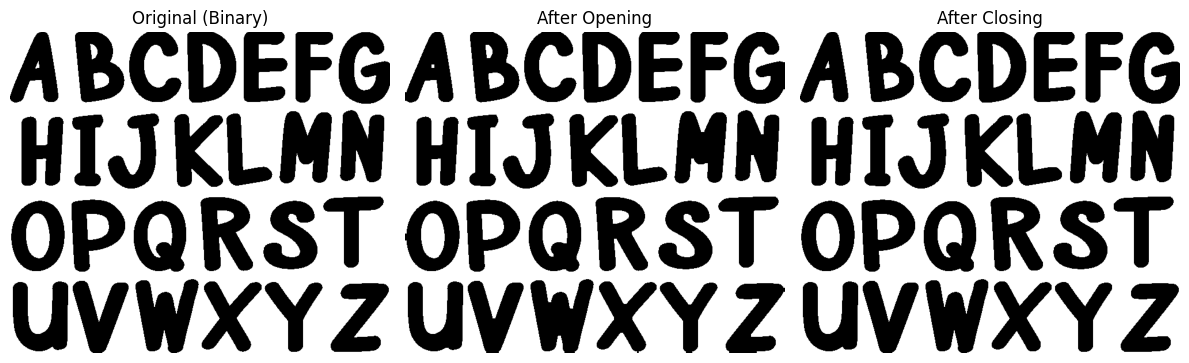

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original (Binary)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('After Opening')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('After Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

## **Lab Task 3: Morphological Gradient**

### **Objective**

Implement the **morphological gradient** operation and understand its significance in highlighting object boundaries.

---

### **Instructions**

* Select a **new image** for testing.
* Apply the **morphological gradient** operation and display the resulting image.
* Discuss how the morphological gradient highlights **edges and boundaries** in the image.
* Experiment with **different structuring elements** and observe their effects.

---

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [17]:
kernels = {
    '3x3': np.ones((3, 3), np.uint8),
    '5x5': np.ones((5, 5), np.uint8),
    '7x7': np.ones((7, 7), np.uint8)
}

In [18]:
results = []
for size, k in kernels.items():
    gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, k)
    results.append((size, gradient))

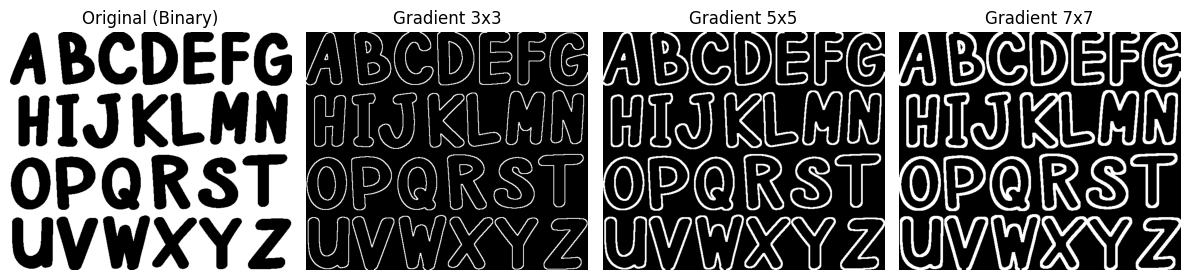

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(binary, cmap='gray')
plt.title('Original (Binary)')
plt.axis('off')

for i, (size, grad) in enumerate(results, start=2):
    plt.subplot(1, 4, i)
    plt.imshow(grad, cmap='gray')
    plt.title(f'Gradient {size}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Lab Task 4: Top Hat**

### **Objective**

Implement the **Top Hat** morphological operation using OpenCV and analyze its impact on enhancing image details.

---

### **Instructions**

* Choose **another image** for testing.
* Apply the **Top Hat** operation and display the **original** image along with the **result**.
* Explain how the Top Hat operation helps in **revealing fine details** in an image.

---

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
kernel = np.ones((9, 9), np.uint8)

In [22]:
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

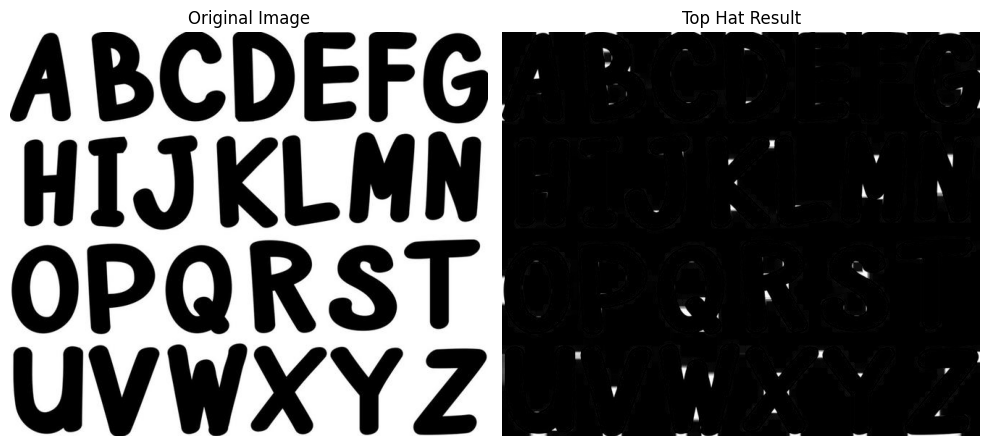

In [23]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tophat, cmap='gray')
plt.title('Top Hat Result')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Explanation**

| Operation   | Definition                                                     | Effect                                                                                    |
| ----------- | -------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **Top Hat** | Difference between the **original image** and its **opening**. | Highlights small bright regions or details that are smaller than the structuring element. |


---

### **Impact on Image Details**

* The **Top Hat operation** enhances **small bright features** that may otherwise be lost in the background.
* It is especially useful for:

  * Uneven lighting correction
  * Extracting small bright spots (e.g., text, dust, reflections)
  * Improving local contrast

---

### **Observation**

* Small kernel sizes highlight **fine, local bright details**.
* Larger kernels emphasize **broader contrast differences**.
* The resulting image clearly shows small bright structures that were previously subdued by the background — making the **Top Hat transform a valuable tool in image preprocessing and enhancement**.

---

## **Lab Task 5: Black Hat**

### **Objective**

Implement the **Black Hat** morphological operation using OpenCV and evaluate its effects on enhancing dark features in bright regions.

---

### **Instructions**

* Select a **different image** for testing.
* Apply the **Black Hat** operation and display both the **original image** and the **resulting image**.
* Discuss application scenarios where the Black Hat operation can be useful.

---

In [24]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
kernel = np.ones((9, 9), np.uint8)

In [26]:
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

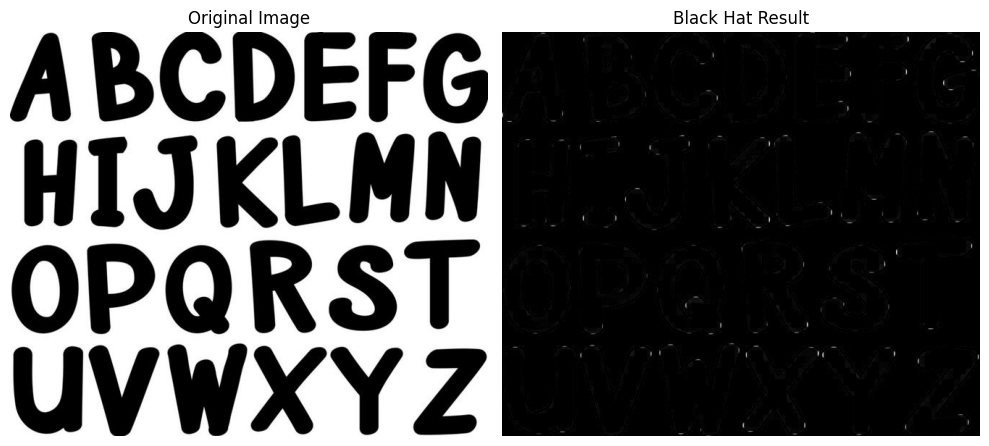

In [27]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blackhat, cmap='gray')
plt.title('Black Hat Result')
plt.axis('off')

plt.tight_layout()
plt.show()

### **Explanation**

| Operation     | Definition                                                                 | Effect                                                            |
| ------------- | -------------------------------------------------------------------------- | ----------------------------------------------------------------- |
| **Black Hat** | Difference between the **closing** of an image and the **original image**. | Highlights small **dark regions** or shadows within bright areas. |


---

### **Impact on Image Features**

* The **Black Hat** operation enhances **dark spots**, **shadows**, and **depressions** in otherwise bright regions.
* It reveals **low-intensity details** that are smaller than the structuring element.

---

### **Observation**

* Small kernels reveal **fine dark details** such as text on bright paper or small shadows.
* Large kernels emphasize **larger dark areas** and uneven lighting.
* The resulting image highlights subtle intensity drops—making the Black Hat transform useful for **feature extraction** and **illumination correction**.

---

### **Applications**

* Detecting **dark text or handwriting** on bright backgrounds (e.g., document analysis).
* Identifying **cracks, scratches, or defects** on bright surfaces.
* Enhancing **shadow details** in high-contrast or unevenly illuminated images.
---

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

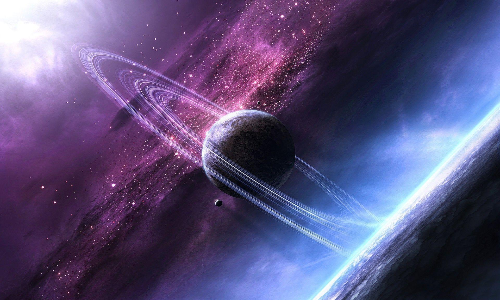

In [29]:
image = cv2.imread("/content/P8ORt6M.jpg")
image = cv2.resize(image, (500, 300))
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

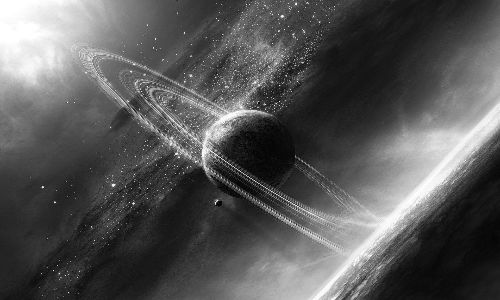

In [31]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

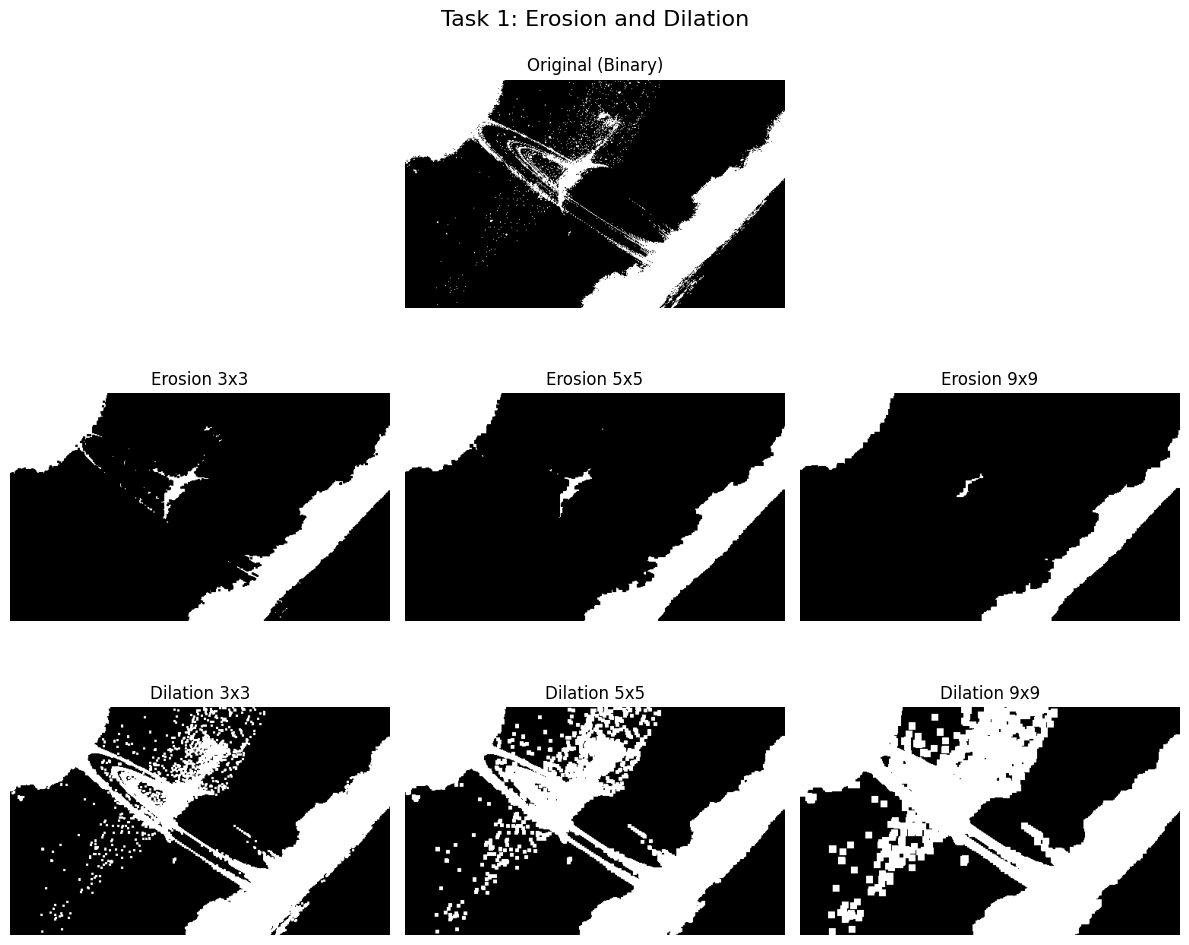

In [32]:
kernel_sizes = [3, 5, 9]
results = []

for size in kernel_sizes:
    kernel = np.ones((size, size), np.uint8)
    erosion = cv2.erode(binary, kernel, iterations=1)
    dilation = cv2.dilate(binary, kernel, iterations=1)
    results.append((size, erosion, dilation))

plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title('Original (Binary)')
plt.axis('off')

for i, (size, erosion, _) in enumerate(results, start=4):
    plt.subplot(3, 3, i)
    plt.imshow(erosion, cmap='gray')
    plt.title(f'Erosion {size}x{size}')
    plt.axis('off')

for i, (size, _, dilation) in enumerate(results, start=7):
    plt.subplot(3, 3, i)
    plt.imshow(dilation, cmap='gray')
    plt.title(f'Dilation {size}x{size}')
    plt.axis('off')

plt.suptitle('Task 1: Erosion and Dilation', fontsize=16)
plt.tight_layout()
plt.show()

# --- Observations ---
# Erosion removes small white noise and shrinks objects.
# Dilation expands white regions and fills small holes.
# Larger kernels exaggerate these effects.

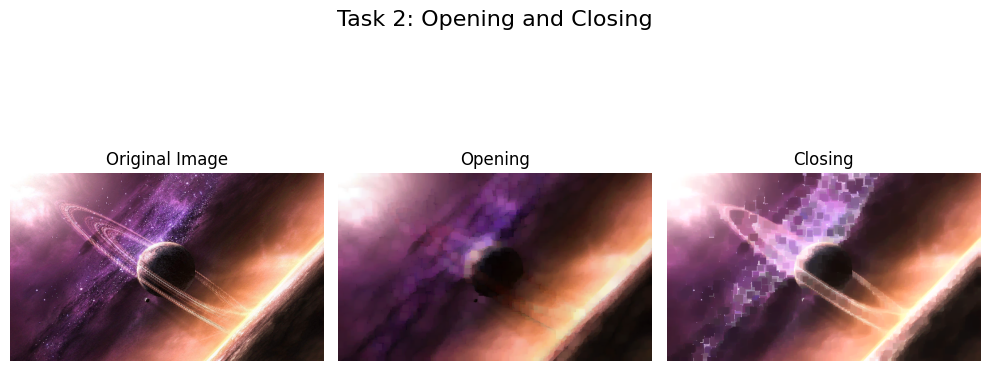

In [38]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opening')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closing')
plt.axis('off')

plt.suptitle('Task 2: Opening and Closing', fontsize=16)
plt.tight_layout()
plt.show()

# --- Observations ---
# Opening removes small white objects (noise).
# Closing fills small black holes in white regions.
# Useful for preprocessing before contour detection.

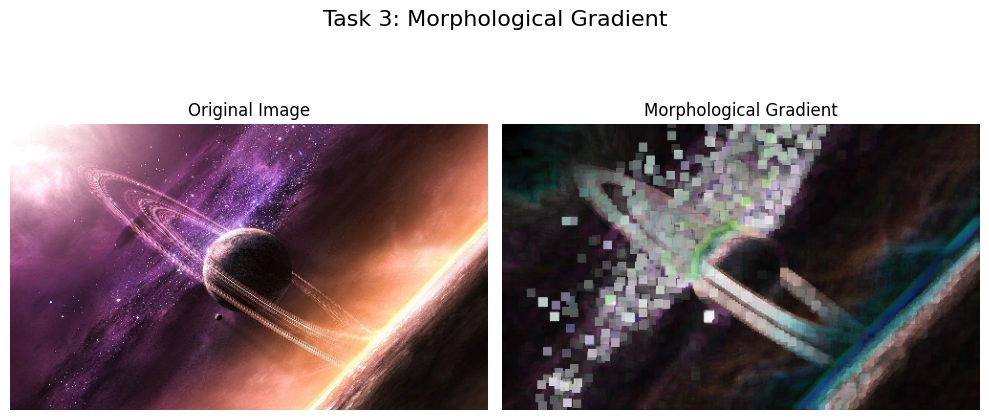

In [35]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gradient, cmap='gray')
plt.title('Morphological Gradient')
plt.axis('off')

plt.suptitle('Task 3: Morphological Gradient', fontsize=16)
plt.tight_layout()
plt.show()

# --- Observations ---
# The gradient highlights the edges/boundaries of objects.
# It is useful for edge detection and segmentation.


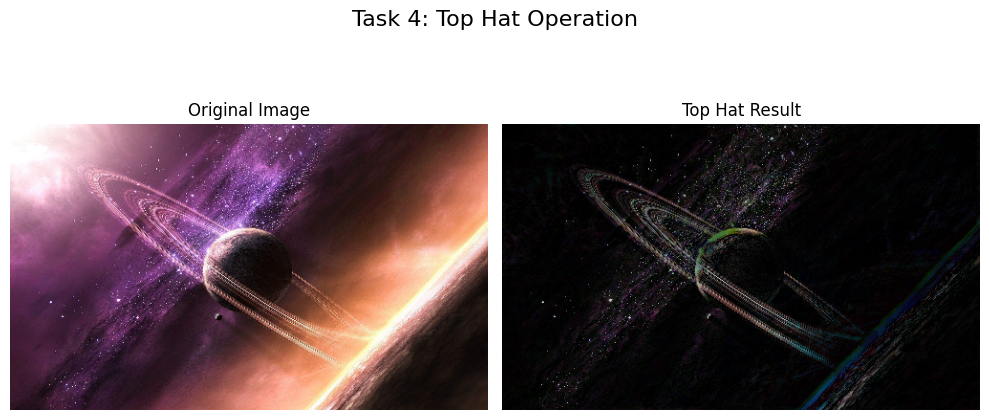

In [36]:
kernel = np.ones((9, 9), np.uint8)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tophat, cmap='gray')
plt.title('Top Hat Result')
plt.axis('off')

plt.suptitle('Task 4: Top Hat Operation', fontsize=16)
plt.tight_layout()
plt.show()

# --- Observations ---
# Top Hat = Original - Opening
# Reveals small bright regions on darker backgrounds.
# Useful for enhancing highlights or uneven illumination correction.

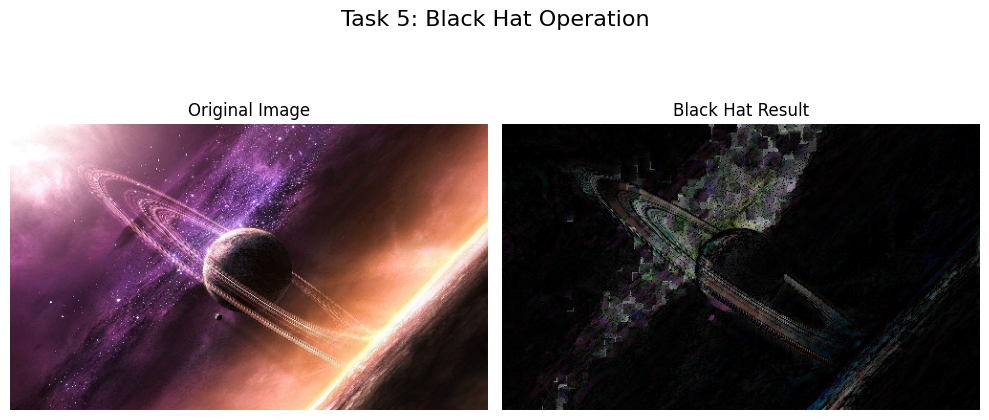

In [37]:
kernel = np.ones((9, 9), np.uint8)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blackhat, cmap='gray')
plt.title('Black Hat Result')
plt.axis('off')

plt.suptitle('Task 5: Black Hat Operation', fontsize=16)
plt.tight_layout()
plt.show()

# --- Observations ---
# Black Hat = Closing - Original
# Highlights small dark details on bright backgrounds.
# Useful for detecting shadows, cracks, or dark text on light surfaces.